In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Review of class material on Linear Regression

### Relevant Topics
- Mean Square Error (MSE) 
- Linear Regression Models
- Sklearn
- R^2 Error

## Mean Square Error (MSE)
This is a metric that we can use to see how well we can fit the line of best fit. Linear regression should give us a line that has the smallest possible MSE

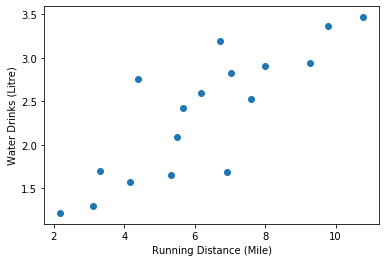

In [5]:
# Running Distance in Mile
x = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])

# Water Drinks in Litre
y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])

_= plt.scatter(x, y)
_= plt.xlabel('Running Distance (Mile)')
_= plt.ylabel('Water Drinks (Litre)')

#### Linear Regression formula: y = w1 * x + w0
We want to find w0 and w1 so that our MSE is minimized

In [16]:
def min_sq_error(x, y, w1, w0):
    # This is our predicted line based on w1 and w0 inputs
    y_pred = [w1*i + w0 for i in x]
    # Here we find the squared error between actual y and predicted y
    sum_squared_error = sum([(i-j)**2 for i,j in zip(y_pred, y)])
    n = len(y)
    # Find the MEAN squared error.
    mse = sum_squared_error/n
    return y_pred, mse

#### Let's see what w1 of .7 and w0 of 1 gives us!

In [17]:
print(f'MSE of w1: .7 and w0: 1 is: {min_sq_error(x, y, .7, 1)[1]}')

MSE of w1: .7 and w0: 1 is: 10.220283689999999


#### Not that good, let's try w1: .2416 and w0: .798

In [18]:
print(f'MSE of w1: .2416 and w0: .798 is: {min_sq_error(x, y, .2416, .798)[1]}')

MSE of w1: .2416 and w0: .798 is: 0.15841770274891293


### Sklearn.metrics has a MSE module that we can also use instead of writing our own function

In [19]:
from sklearn.metrics import mean_squared_error

In [20]:
print(f'MSE of w1: .2416 and w0: .798 is: {mean_squared_error(y, min_sq_error(x, y, .2416, .798)[0])}')

MSE of w1: .2416 and w0: .798 is: 0.15841770274891293


This function takes in the the original y, and then the y of line of best fit

## Linear Regression Models
We can use the Sklearn library to create our Regression models instead of writing our own, lets try it out! 

In [21]:
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()

# X has to be a matrix of features
X = x.reshape(-1,1)

# Fit the model
fit = regression_model.fit(X,y)

print(f'W1: {fit.coef_[0]} and W0: {fit.intercept_}')

W1: 0.25163494428355404 and W0: 0.7988012261753894


#### Now we can use this model to make predictions for us

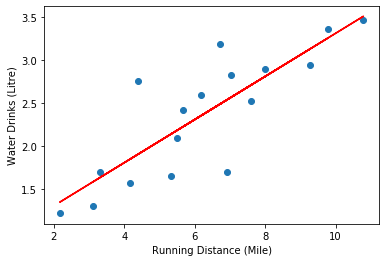

In [27]:
pred_y = fit.predict(X)

# Plot Regression Line
_= plt.scatter(x,y)
_= plt.plot(x, pred_y, 'red')
_= plt.xlabel('Running Distance (Mile)')
_= plt.ylabel('Water Drinks (Litre)')

## Let's try this on a real world dataset - Advertisement Dataset

In [30]:
df = pd.read_csv('advertising.csv')
df = df[['TV', 'radio', 'newspaper', 'sales']]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### We want to build a model that can predict sales based on 3 features:  TV, Radio and Newspaper ad spend
We are going to train the model on the first 150 entries and test on the last 50, and look at the MSE and R^2 score

In [33]:
# Define feature columns
feature_cols = ['TV', 'radio', 'newspaper']

# Define X and Y Train
X_train = df[feature_cols][:150]
Y_train = df['sales'][:150]

In [35]:
ad_regression_model = LinearRegression()
ad_fit = ad_regression_model.fit(X_train, Y_train)

print(f'W1: {ad_fit.coef_[0]} and W0: {ad_fit.intercept_}')

W1: 0.04700011922926804 and W0: 3.029766796293691


In [38]:
# Define X and Y Test
X_test = df[feature_cols][-50:]
Y_test = df['sales'][-50:]

sales_preds = ad_fit.predict(X_test)

In [40]:
# Calculate MSE
print(f'MSE for model: {mean_squared_error(Y_test, sales_preds)}')

MSE for model: 2.66702486838371


#### R^2 is another metric to measure accuracy of model, goes between -1 and 1, where the model gets better as r^2 goes towards 1

In [41]:
from sklearn.metrics import r2_score

# Calculate r^2 score in two ways for this prediction
print(f'R^2 for model: {ad_fit.score(X_test, Y_test)}')
print(f'R^2 for model: {r2_score(Y_test, sales_preds)}')

R^2 for model: 0.8963519785440216
R^2 for model: 0.8963519785440216


### Overall, Sklearn is a very powerful package for machine learning and the goal is to learn how to leverage it's power, but also understand how everything works under the good.
The model we build was pretty good tho! 